<a href="https://colab.research.google.com/github/svf97/threat-hunting/blob/main/jupyter/dll_vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import glob

# # Get all CSV files in the current directory
# csv_files = glob.glob("*.csv")

# # Initialize a list to hold all rows
# all_rows = []

# # Read each file and process the data
# for file in csv_files:
#     with open(file, 'r', encoding='utf-8') as f:
#         for line in f:
#             # Strip newline characters and split by tab
#             row = line.strip().split('\t')
#             all_rows.append(row)

# # Write the merged data to a new CSV file
# with open("merged_output.csv", 'w', encoding='utf-8') as f:
#     for row in all_rows:
#         # Join the row with commas and write to the file
#         f.write(','.join(row) + '\n')

# print("CSV files merged successfully into 'merged_output.csv'")

# VOLATILITY RESULTS FOR DLLs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv('merged_output.csv')
df


,PID,Process,Base,Size,Name,Path,LoadTime,File output
0,384,smss.exe,0x7ff73fda0000,0x28000,smss.exe,\SystemRoot\System32\smss.exe,2021-06-10 0:12:02,Disabled
1,384,smss.exe,0x7ffd2abd0000,0x1f5000,ntdll.dll,C:\Windows\SYSTEM32\ntdll.dll,2021-06-10 0:12:02,Disabled
2,492,csrss.exe,0x7ff7e0cf0000,0x7000,csrss.exe,C:\Windows\system32\csrss.exe,2021-06-10 0:12:09,Disabled
3,492,csrss.exe,0x7ffd2abd0000,0x1f5000,ntdll.dll,C:\Windows\SYSTEM32\ntdll.dll,2021-06-10 0:12:09,Disabled
4,492,csrss.exe,0x7ffd282f0000,0x18000,CSRSRV.dll,C:\Windows\SYSTEM32\CSRSRV.dll,2021-06-10 0:12:09,Disabled
...,...,...,...,...,...,...,...,...
27448,4112,WmiPrvSE.exe,0x7ffaaf2f0000,0x5d000,powrprof.dll,C:\Windows\System32\powrprof.dll,2021-06-14 11:39:42,Disabled
27449,4112,WmiPrvSE.exe,0x7ffaa2180000,0x50000,framedynos.dll,C:\Windows\SYSTEM32\framedynos.dll,2021-06-14 11:39:42,Disabled
27450,4112,WmiPrvSE.exe,0x7ffaaf220000,0x2f000,SspiCli.dll,C:\Windows\SYSTEM32\SspiCli.dll,2021-06-14 11:39:42,Disabled
27451,4112,WmiPrvSE.exe,0x2b3d2750000,0x3000,WMI.DLL,C:\Windows\SYSTEM32\WMI.DLL,2021-06-14 11:39:42,Disabled


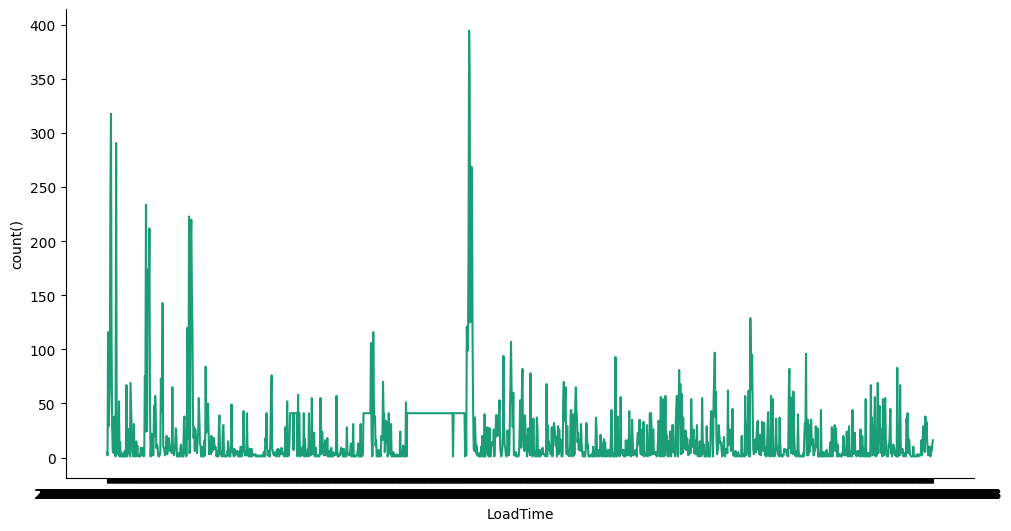

In [ ]:
# @title LoadTime vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['LoadTime']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'LoadTime'}, axis=1)
              .sort_values('LoadTime', ascending=True))
  xs = counted['LoadTime']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('LoadTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LoadTime')
_ = plt.ylabel('count()')

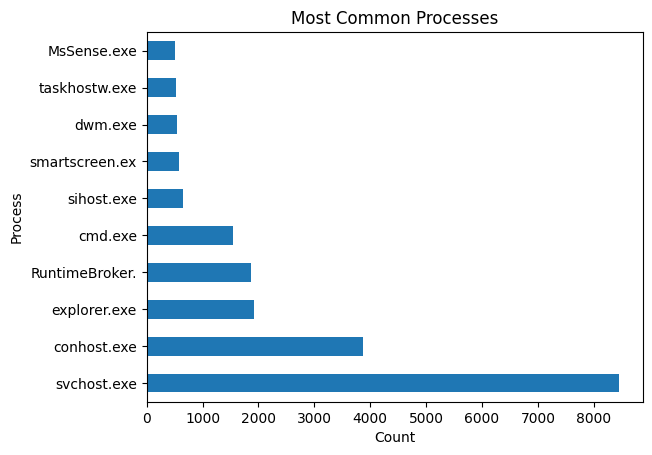

In [ ]:
# @title Most Common Processes

import matplotlib.pyplot as plt

df['Process'].value_counts().nlargest(10).plot(kind='barh')
plt.title('Most Common Processes')
plt.xlabel('Count')
_ = plt.ylabel('Process')

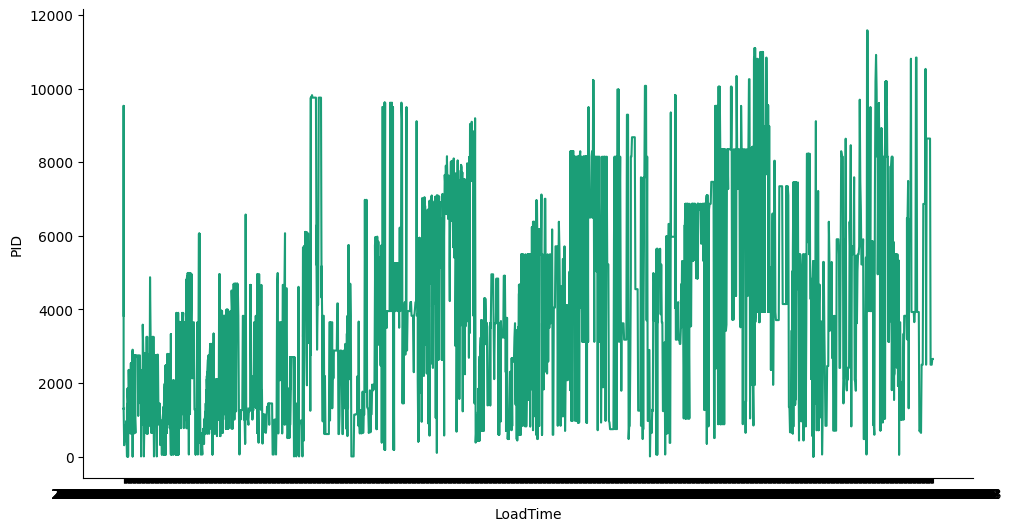

In [ ]:
# @title LoadTime vs PID

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['LoadTime']
  ys = series['PID']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('LoadTime', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('LoadTime')
_ = plt.ylabel('PID')

In [ ]:
df['Process'].unique()
# len(df['Process'].unique())

array(['smss.exe', 'csrss.exe', 'wininit.exe', 'winlogon.exe',
       'services.exe', 'lsass.exe', 'svchost.exe', 'fontdrvhost.ex',
       'dwm.exe', 'VSSVC.exe', 'spoolsv.exe', 'OfficeClickToR',
       'MsSense.exe', 'sysmon64.exe', 'unsecapp.exe', 'SgrmBroker.exe',
       'uhssvc.exe', 'MoUsoCoreWorke', 'SearchIndexer.', 'sihost.exe',
       'taskhostw.exe', 'explorer.exe', 'StartMenuExper',
       'RuntimeBroker.', 'SearchApp.exe', 'SecurityHealth',
       'Microsoft.Phot', 'WmiPrvSE.exe', 'dllhost.exe', 'ctfmon.exe',
       'TextInputHost.', 'ShellExperienc', 'SenseCE.exe', 'SenseNdr.exe',
       'wermgr.exe', 'wsmprovhost.ex', 'tdrE934.exe', 'tdr2269.exe',
       'tdr5BDD.exe', 'cmd.exe', 'conhost.exe', 'powershell.exe',
       'OneDrive.exe', 'sppsvc.exe', 'smartscreen.ex', 'SearchProtocol',
       'SearchFilterHo', 'LogonUI.exe', 'wlms.exe', 'SearchUI.exe',
       'msdtc.exe', 'ApplicationFra', 'rundll32.exe', 'TrustedInstall',
       'TiWorker.exe', 'DumpIt.exe', 'rdpclip.exe',

In [ ]:
## CROSS-REF LOLBAS
# cmd.exe
# powershell.exe
# rundll32.exe
# explorer.exe
# conhost.exe
# msdtc.exe
## ADDITIONALLY
# tdrE934.exe
# tdr2269.exe
# tdr5BDD.exe
#
filtered = df[df['Process'].isin(['cmd.exe', 'powershell.exe', 'rundll32.exe', 'explorer.exe', 'conhost.exe', 'msdtc.exe', 'tdrE934.exe', 'tdr5BDD.exe'])]

In [ ]:
# Sort by Process and LoadTime (as strings)
filtered.sort_values(by=['Process', 'LoadTime'], inplace=True)
#

<ipython-input-23-eb2ae559d214>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# filtered[['Process','PID']]

# Find duplicate Parent PIDs
duplicate_pids = filtered['PID'].value_counts()
duplicate_pids = duplicate_pids[duplicate_pids > 1].index

# Create a DataFrame with unique Parent PIDs that are duplicates
unique_duplicates_df = filtered[filtered['PID'].isin(duplicate_pids)].drop_duplicates(subset=['PID'])

# Display the resulting DataFrame with unique duplicate Parent PIDs
unique_duplicates_df[['Process', 'PID']]

,Process,PID
18983,cmd.exe,5688
19024,cmd.exe,4088
19065,cmd.exe,5728
19106,cmd.exe,4144
19147,cmd.exe,4588
...,...,...
15502,rundll32.exe,6324
25219,rundll32.exe,376
15557,rundll32.exe,4200
7550,tdr5BDD.exe,2900


In [ ]:
# Create a tree-like structure
tree_structure = {}

for _, row in filtered.iterrows():
    process = row['Process']
    child_info = {
        'PID': row['PID'],
        'Base': row['Base'],
        'Size': row['Size'],
        'Path': row['Path'],
        'LoadTime': row['LoadTime'],
        'Name': row['Name']
    }

    if process not in tree_structure:
        tree_structure[process] = []

    tree_structure[process].append(child_info)

# Display the tree structure
for process, children in tree_structure.items():
    print(f"Process: {process}")
    for child in children:
        print(f"  Child: {child['Name']}, LoadTime: {child['LoadTime']}, Path: {child['Path']}")



Streaming output truncated to the last 5000 lines.
  Child: shcore.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\shcore.dll
  Child: msvcrt.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\msvcrt.dll
  Child: RPCRT4.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\RPCRT4.dll
  Child: combase.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\combase.dll
  Child: bcryptPrimitives.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\bcryptPrimitives.dll
  Child: advapi32.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\advapi32.dll
  Child: sechost.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\sechost.dll
  Child: user32.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\user32.dll
  Child: win32u.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\win32u.dll
  Child: GDI32.dll, LoadTime: 2021-06-09 3:44:02, Path: C:\Windows\System32\GDI32.dll
  Child: gdi32full.dll, LoadTime: 2021-06-0

In [ ]:
# tree_structure["Microsoft.Acti"]
# len(tree_structure)


search_key = 'tdr5BDD'

# Substring Key match in dictionary
res = [val for key, val in tree_structure.items() if search_key in key]

res

[[{'PID': 2900,
   'Base': '0x7ff60df00000',
   'Size': '0x328000',
   'Path': 'C:\\Users\\HARVEY~1.SWA\\AppData\\Local\\Temp\\tdr5BDD.exe',
   'LoadTime': '2021-06-11 14:17:07',
   'Name': 'tdr5BDD.exe'},
  {'PID': 2900,
   'Base': '0x7ffd2abd0000',
   'Size': '0x1f5000',
   'Path': 'C:\\Windows\\SYSTEM32\\ntdll.dll',
   'LoadTime': '2021-06-11 14:17:07',
   'Name': 'ntdll.dll'},
  {'PID': 2900,
   'Base': '0x7ffd29c60000',
   'Size': '0xbd000',
   'Path': 'C:\\Windows\\System32\\KERNEL32.DLL',
   'LoadTime': '2021-06-11 14:17:07',
   'Name': 'KERNEL32.DLL'},
  {'PID': 2900,
   'Base': '0x7ffd28720000',
   'Size': '0x2c8000',
   'Path': 'C:\\Windows\\System32\\KERNELBASE.dll',
   'LoadTime': '2021-06-11 14:17:07',
   'Name': 'KERNELBASE.dll'},
  {'PID': 2900,
   'Base': '0x7ffd25c30000',
   'Size': '0x90000',
   'Path': 'C:\\Windows\\SYSTEM32\\apphelp.dll',
   'LoadTime': '2021-06-11 14:17:07',
   'Name': 'apphelp.dll'},
  {'PID': 2900,
   'Base': '0x7ffd28fc0000',
   'Size': '0x1a000

In [ ]:
process_counts = filtered['Process'].value_counts()
process_counts

,count
Process,
conhost.exe,3871
explorer.exe,1928
cmd.exe,1545
rundll32.exe,291
msdtc.exe,147
powershell.exe,90
tdrE934.exe,48
tdr5BDD.exe,46


In [ ]:
# Visualizing process usage
# Count the number of children per process
import plotly.express as px

# Create a DataFrame for Plotly
process_df = process_counts.reset_index()
process_df.columns = ['Process', 'Number of Children']

# Create an interactive bar plot
fig = px.bar(process_df, x='Process', y='Number of Children',
             title='Number of Children Spawned by Each Process',
             labels={'Number of Children': 'Number of Children', 'Process': 'Process'},
             color='Number of Children',
             color_continuous_scale='viridis')

# Update layout for better visibility
# fig.update_layout(xaxis_tickangle=-45, width=1000, height=600)
fig.show()

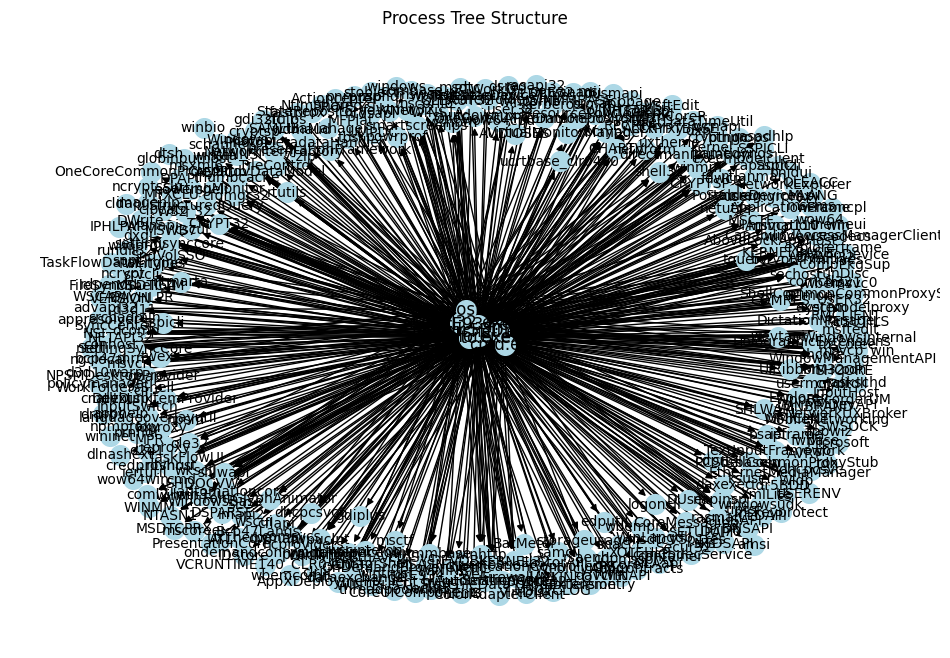

In [ ]:
#EF
# WIP

# import networkx as nx
# import matplotlib.pyplot as plt

# G = nx.DiGraph()

# # Add nodes and edges to the graph
# for _, row in filtered.iterrows():
#     process = row['Process']
#     child = row['Name'].split('.')[0]
#     load_time = row['LoadTime']
#     G.add_node(process)
#     G.add_node(child)
#     G.add_edge(process, child)

# # Set positions for the nodes
# pos = nx.spring_layout(G, k=0.5, iterations=30)  # Adjust k for spacing

# # Create a larger figure
# plt.figure(figsize=(12, 8))  # Adjust size as needed

# # Draw the nodes
# nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')

# # Draw the edges
# nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=10)

# # Draw labels
# labels = {child: child for child in G.nodes if child not in filtered['Process'].values}
# nx.draw_networkx_labels(G, pos, labels, font_size=10)

# # Draw process labels separately
# process_labels = {process: process for process in filtered['Process'].unique()}
# nx.draw_networkx_labels(G, pos, process_labels, font_color='black', font_size=12)

# # Show the plot
# plt.title("Process Tree Structure")
# plt.axis('off')  # Turn off the axis
# plt.show()

## Volatility PSScan

In [ ]:
merged_ps = pd.read_csv('merged-pss.csv')
merged_ps['Threads'].max

<bound method Series.max of 0              7
1            164
2              9
3              2
4              4
         ...    
859            9
860            6
861    741684069
862            0
863            4
Name: Threads, Length: 864, dtype: int64>

In [ ]:
import plotly.express as px

# Group data by PPID and count the number of threads
ppid_threads = merged_ps.groupby('PPID')['Threads'].sum().reset_index()

# Create the scatter plot
fig = px.scatter(ppid_threads, x='PPID', y='Threads',
                 title='Relationship between PPID and Number of Threads',
                 labels={'PPID': 'Parent Process ID', 'Threads': 'Number of Threads'},
                 trendline="ols")

fig.show()